<a href="https://colab.research.google.com/github/Deepak-Mewada/NeuralDecoder/blob/main/BrainDecoder/Basics/hyperparameter_tuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install braindecode

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.2/165.2 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 29.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.3/239.3 kB 15.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.6/44.6 kB 3.3 MB/s eta 0:00:00


In [ ]:
!pip install moabb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 563.8/563.8 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.2/233.2 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 27.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 41.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.2/119.2 kB 14.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.8/143.8 kB 15.9 MB/s eta 0:00:00
  Created wheel for pyriemann: filename=pyriemann-0.5-py2.py3-none-any.whl size=107752 sha256=988030d2e2ccedd2832d8b8a273239c950daaf30eb08cae38dbfa8f25d9c0e02
  Stored in directory: /root/.cache/pip/wheels/84/86/79/622e9c1dc933dc088e287ebfaac5aa9bdc6a38a9db193ce1f1
Successfully built pyriemann
  Attempting uninstall: urllib3
    Found existing installation: urllib3 2.0.7
    Uninstalling urllib3-2.0.7:
      Successfully uninstalled urllib3-2.0.7
  Attempting uninsta

In [ ]:
from braindecode.datasets.moabb import MOABBDataset

subject_id = 3
dataset = MOABBDataset(dataset_name = "BNCI2014_001", subject_ids = [subject_id])


<frozen importlib._bootstrap>:241: FutureWarning: mne.io.pick.pick_types is deprecated will be removed in 1.6, use documented public API instead. If no appropriate public API exists, please open an issue on GitHub.
<frozen importlib._bootstrap>:241: FutureWarning: mne.io.pick.pick_channels_regexp is deprecated will be removed in 1.6, use documented public API instead. If no appropriate public API exists, please open an issue on GitHub.
<frozen importlib._bootstrap>:241: FutureWarning: mne.io.pick.channel_type is deprecated will be removed in 1.6, use documented public API instead. If no appropriate public API exists, please open an issue on GitHub.
/usr/local/lib/python3.10/dist-packages/moabb/pipelines/__init__.py:26: ModuleNotFoundError: Tensorflow is not installed. You won't be able to use these MOABB pipelines if you attempt to do so.
  warn(
/usr/local/lib/python3.10/dist-packages/moabb/datasets/download.py:55: RuntimeWarning: Setting non-standard config type: "MNE_DATASETS_BNCI_P

MNE_DATA is not already configured. It will be set to default location in the home directory - /root/mne_data
All datasets will be downloaded to this location, if anything is already downloaded, please move manually to this location


/usr/local/lib/python3.10/dist-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'lampx.tugraz.at'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
100%|█████████████████████████████████████| 44.1M/44.1M [00:00<00:00, 13.8GB/s]
SHA256 hash of downloaded file: 7e731ee8b681d5da6ecb11ae1d4e64b1653c7f15aad5d6b7620b25ce53141e80
Use this value as the 'known_hash' argument of 'pooch.retrieve' to ensure that the file hasn't changed if it is downloaded again in the future.
/usr/local/lib/python3.10/dist-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'lampx.tugraz.at'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
100%|█████████████████████████████████████| 42.3M/42.3M [

In [ ]:
from braindecode.preprocessing.preprocess import(
    exponential_moving_standardize, preprocess, Preprocessor
)
from numpy import multiply

low_cut_hz = 4
high_cut_hz = 38

factor_new = 1e-3
init_block_size = 1000
factor = 1e6

preprocessors = [
    Preprocessor('pick_types', eeg = True, meg = False, stim = False),
    Preprocessor(lambda data:multiply(data, factor)),
    Preprocessor('filter', l_freq = low_cut_hz , h_freq = high_cut_hz),
    Preprocessor(exponential_moving_standardize,
                 factor_new = factor_new, init_block_size = init_block_size)
]

preprocess(dataset, preprocessors, n_jobs = -1)


/usr/local/lib/python3.10/dist-packages/braindecode/preprocessing/preprocess.py:55: UserWarning: Preprocessing choices with lambda functions cannot be saved.
  warn('Preprocessing choices with lambda functions cannot be saved.')


In [ ]:
from braindecode.preprocessing.windowers import create_windows_from_events

trial_start_offset_seconds = -0.5
sfreq = dataset.datasets[0].raw.info['sfreq']
assert all ([ds.raw.info['sfreq'] == sfreq for ds in dataset.datasets])
trial_start_offset_samples = int(trial_start_offset_seconds * sfreq)

windows_dataset = create_windows_from_events(
    dataset,
    trial_start_offset_samples = trial_start_offset_samples,
    trial_stop_offset_samples = 0,
    preload = True
)

Used Annotations descriptions: ['feet', 'left_hand', 'right_hand', 'tongue']
Used Annotations descriptions: ['feet', 'left_hand', 'right_hand', 'tongue']
Used Annotations descriptions: ['feet', 'left_hand', 'right_hand', 'tongue']
Used Annotations descriptions: ['feet', 'left_hand', 'right_hand', 'tongue']
Used Annotations descriptions: ['feet', 'left_hand', 'right_hand', 'tongue']
Used Annotations descriptions: ['feet', 'left_hand', 'right_hand', 'tongue']
Used Annotations descriptions: ['feet', 'left_hand', 'right_hand', 'tongue']
Used Annotations descriptions: ['feet', 'left_hand', 'right_hand', 'tongue']
Used Annotations descriptions: ['feet', 'left_hand', 'right_hand', 'tongue']
Used Annotations descriptions: ['feet', 'left_hand', 'right_hand', 'tongue']
Used Annotations descriptions: ['feet', 'left_hand', 'right_hand', 'tongue']
Used Annotations descriptions: ['feet', 'left_hand', 'right_hand', 'tongue']


In [ ]:
splitted = windows_dataset.split('session')
train_set = splitted['0train']
eval_set = splitted['1test']

In [ ]:
from functools import partial
import torch
from braindecode.util import set_random_seeds
from braindecode.models import ShallowFBCSPNet

cuda = torch.cuda.is_available()
device = 'cuda' if cuda else 'cpu'
if cuda:
  torch.backends.cudnn.benchmark = True
seed = 20200020
set_random_seeds(seed =seed, cuda = cuda)

n_classes = 4
n_chans = train_set[0][0].shape[0]
input_window_samples = train_set[0][0].shape[1]

model = partial(ShallowFBCSPNet, n_chans, n_classes,
                input_window_samples = input_window_samples,
                final_conv_length = 'auto')

if cuda:
  model.cuda()

In [ ]:
from skorch.callbacks import LRScheduler
from skorch.dataset import ValidSplit
from braindecode import EEGClassifier

batch_size = 16
n_epochs = 2

clf = EEGClassifier(
    model,
    criterion = torch.nn.NLLLoss,
    optimizer = torch.optim.AdamW,
    optimizer__lr = [],
    batch_size = batch_size,
    train_split = ValidSplit(0.2, random_state = seed),
    callbacks = ["accuracy",
     ("lr_scheduler", LRScheduler('CosineAnnealingLR', T_max = n_epochs - 1 )),],
    device = device
)

In [ ]:
from sklearn.model_selection import GridSearchCV, KFold
from skorch.helper import SliceDataset
from numpy import array
import pandas as pd


train_X = SliceDataset(train_set, idx= 0)
train_y = array([y for y in SliceDataset(train_set, idx=1)])
cv = KFold(n_splits = 2, shuffle = True, random_state = 42)

learning_rates = [0.00625, 0.0000625]
drop_probs = [ 0.2, 0.5, 0.8]

fit_params = {'epochs': n_epochs}
param_grid = {
    'optimizer__lr': learning_rates,
    'module__drop_prob': drop_probs
}

search = GridSearchCV(
    estimator = clf,
    param_grid = param_grid,
    cv = cv,
    return_train_score = True,
    scoring = 'accuracy',
    refit = True,
    verbose = 1,
    error_score = 'raise',
    n_jobs = 1
)

search.fit(train_X, train_y, **fit_params)
search_results = pd.DataFrame(search.cv_results_)


Fitting 2 folds for each of 6 candidates, totalling 12 fits


/usr/local/lib/python3.10/dist-packages/braindecode/models/base.py:23: UserWarning: ShallowFBCSPNet: 'input_window_samples' is depreciated. Use 'n_times' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/braindecode/models/base.py:180: UserWarning: LogSoftmax final layer will be removed! Please adjust your loss function accordingly (e.g. CrossEntropyLoss)!
  warnings.warn("LogSoftmax final layer will be removed! " +


  epoch    train_accuracy    train_loss    valid_acc    valid_accuracy    valid_loss      lr     dur
-------  ----------------  ------------  -----------  ----------------  ------------  ------  ------
      1            0.4261        2.2452       0.2069            0.2069        3.6743  0.0063  3.7321
      2            0.5304        1.2822       0.2759            0.2759        2.3655  0.0000  2.4262


/usr/local/lib/python3.10/dist-packages/braindecode/models/base.py:23: UserWarning: ShallowFBCSPNet: 'input_window_samples' is depreciated. Use 'n_times' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/braindecode/models/base.py:180: UserWarning: LogSoftmax final layer will be removed! Please adjust your loss function accordingly (e.g. CrossEntropyLoss)!
  warnings.warn("LogSoftmax final layer will be removed! " +


  epoch    train_accuracy    train_loss    valid_acc    valid_accuracy    valid_loss      lr     dur
-------  ----------------  ------------  -----------  ----------------  ------------  ------  ------
      1            0.3478        2.2813       0.1724            0.1724        8.5815  0.0063  1.5952
      2            0.4957        1.4689       0.1724            0.1724        4.5568  0.0000  1.6016


/usr/local/lib/python3.10/dist-packages/braindecode/models/base.py:23: UserWarning: ShallowFBCSPNet: 'input_window_samples' is depreciated. Use 'n_times' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/braindecode/models/base.py:180: UserWarning: LogSoftmax final layer will be removed! Please adjust your loss function accordingly (e.g. CrossEntropyLoss)!
  warnings.warn("LogSoftmax final layer will be removed! " +


  epoch    train_accuracy    train_loss    valid_acc    valid_accuracy    valid_loss      lr     dur
-------  ----------------  ------------  -----------  ----------------  ------------  ------  ------
      1            0.2435        1.6663       0.2414            0.2414        4.9069  0.0001  1.5876
      2            0.2435        1.5390       0.2414            0.2414        3.7656  0.0000  1.6786


/usr/local/lib/python3.10/dist-packages/braindecode/models/base.py:23: UserWarning: ShallowFBCSPNet: 'input_window_samples' is depreciated. Use 'n_times' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/braindecode/models/base.py:180: UserWarning: LogSoftmax final layer will be removed! Please adjust your loss function accordingly (e.g. CrossEntropyLoss)!
  warnings.warn("LogSoftmax final layer will be removed! " +


  epoch    train_accuracy    train_loss    valid_acc    valid_accuracy    valid_loss      lr     dur
-------  ----------------  ------------  -----------  ----------------  ------------  ------  ------
      1            0.2870        1.5193       0.4138            0.4138        1.5206  0.0001  2.3944
      2            0.2870        1.5280       0.4138            0.4138        1.4929  0.0000  1.5927


/usr/local/lib/python3.10/dist-packages/braindecode/models/base.py:23: UserWarning: ShallowFBCSPNet: 'input_window_samples' is depreciated. Use 'n_times' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/braindecode/models/base.py:180: UserWarning: LogSoftmax final layer will be removed! Please adjust your loss function accordingly (e.g. CrossEntropyLoss)!
  warnings.warn("LogSoftmax final layer will be removed! " +


  epoch    train_accuracy    train_loss    valid_acc    valid_accuracy    valid_loss      lr     dur
-------  ----------------  ------------  -----------  ----------------  ------------  ------  ------
      1            0.4435        1.9466       0.4138            0.4138        1.6241  0.0063  1.6048
      2            0.5478        1.1695       0.4828            0.4828        1.5909  0.0000  1.5895


/usr/local/lib/python3.10/dist-packages/braindecode/models/base.py:23: UserWarning: ShallowFBCSPNet: 'input_window_samples' is depreciated. Use 'n_times' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/braindecode/models/base.py:180: UserWarning: LogSoftmax final layer will be removed! Please adjust your loss function accordingly (e.g. CrossEntropyLoss)!
  warnings.warn("LogSoftmax final layer will be removed! " +


  epoch    train_accuracy    train_loss    valid_acc    valid_accuracy    valid_loss      lr     dur
-------  ----------------  ------------  -----------  ----------------  ------------  ------  ------
      1            0.3043        1.9984       0.1379            0.1379        9.7192  0.0063  1.6836
      2            0.4609        1.0855       0.2414            0.2414        3.2521  0.0000  2.5845


/usr/local/lib/python3.10/dist-packages/braindecode/models/base.py:23: UserWarning: ShallowFBCSPNet: 'input_window_samples' is depreciated. Use 'n_times' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/braindecode/models/base.py:180: UserWarning: LogSoftmax final layer will be removed! Please adjust your loss function accordingly (e.g. CrossEntropyLoss)!
  warnings.warn("LogSoftmax final layer will be removed! " +


  epoch    train_accuracy    train_loss    valid_acc    valid_accuracy    valid_loss      lr     dur
-------  ----------------  ------------  -----------  ----------------  ------------  ------  ------
      1            0.2435        1.6895       0.2414            0.2414        4.8121  0.0001  1.6142
      2            0.2435        1.6390       0.2414            0.2414        3.8950  0.0000  1.5999


/usr/local/lib/python3.10/dist-packages/braindecode/models/base.py:23: UserWarning: ShallowFBCSPNet: 'input_window_samples' is depreciated. Use 'n_times' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/braindecode/models/base.py:180: UserWarning: LogSoftmax final layer will be removed! Please adjust your loss function accordingly (e.g. CrossEntropyLoss)!
  warnings.warn("LogSoftmax final layer will be removed! " +


  epoch    train_accuracy    train_loss    valid_acc    valid_accuracy    valid_loss      lr     dur
-------  ----------------  ------------  -----------  ----------------  ------------  ------  ------
      1            0.2870        1.4732       0.1379            0.1379        3.9008  0.0001  1.5905
      2            0.2870        1.5704       0.1379            0.1379        3.1518  0.0000  1.5741


/usr/local/lib/python3.10/dist-packages/braindecode/models/base.py:23: UserWarning: ShallowFBCSPNet: 'input_window_samples' is depreciated. Use 'n_times' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/braindecode/models/base.py:180: UserWarning: LogSoftmax final layer will be removed! Please adjust your loss function accordingly (e.g. CrossEntropyLoss)!
  warnings.warn("LogSoftmax final layer will be removed! " +


  epoch    train_accuracy    train_loss    valid_acc    valid_accuracy    valid_loss      lr     dur
-------  ----------------  ------------  -----------  ----------------  ------------  ------  ------
      1            0.2348        2.1721       0.3793            0.3793        2.6460  0.0063  2.5457
      2            0.4261        1.9046       0.3448            0.3448        1.6544  0.0000  1.6549


/usr/local/lib/python3.10/dist-packages/braindecode/models/base.py:23: UserWarning: ShallowFBCSPNet: 'input_window_samples' is depreciated. Use 'n_times' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/braindecode/models/base.py:180: UserWarning: LogSoftmax final layer will be removed! Please adjust your loss function accordingly (e.g. CrossEntropyLoss)!
  warnings.warn("LogSoftmax final layer will be removed! " +


  epoch    train_accuracy    train_loss    valid_acc    valid_accuracy    valid_loss      lr     dur
-------  ----------------  ------------  -----------  ----------------  ------------  ------  ------
      1            0.3217        2.2897       0.1724            0.1724        5.3832  0.0063  1.5811
      2            0.3913        1.7814       0.2414            0.2414        2.7219  0.0000  1.5861


/usr/local/lib/python3.10/dist-packages/braindecode/models/base.py:23: UserWarning: ShallowFBCSPNet: 'input_window_samples' is depreciated. Use 'n_times' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/braindecode/models/base.py:180: UserWarning: LogSoftmax final layer will be removed! Please adjust your loss function accordingly (e.g. CrossEntropyLoss)!
  warnings.warn("LogSoftmax final layer will be removed! " +


  epoch    train_accuracy    train_loss    valid_acc    valid_accuracy    valid_loss      lr     dur
-------  ----------------  ------------  -----------  ----------------  ------------  ------  ------
      1            0.3391        1.9405       0.0345            0.0345        5.2542  0.0001  1.5935
      2            0.3391        2.1475       0.0345            0.0345        4.0043  0.0000  2.4577


/usr/local/lib/python3.10/dist-packages/braindecode/models/base.py:23: UserWarning: ShallowFBCSPNet: 'input_window_samples' is depreciated. Use 'n_times' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/braindecode/models/base.py:180: UserWarning: LogSoftmax final layer will be removed! Please adjust your loss function accordingly (e.g. CrossEntropyLoss)!
  warnings.warn("LogSoftmax final layer will be removed! " +


  epoch    train_accuracy    train_loss    valid_acc    valid_accuracy    valid_loss      lr     dur
-------  ----------------  ------------  -----------  ----------------  ------------  ------  ------
      1            0.3391        1.9695       0.2759            0.2759        3.5481  0.0001  1.6380
      2            0.3652        1.8683       0.2759            0.2759        2.9241  0.0000  1.5802


/usr/local/lib/python3.10/dist-packages/braindecode/models/base.py:23: UserWarning: ShallowFBCSPNet: 'input_window_samples' is depreciated. Use 'n_times' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/braindecode/models/base.py:180: UserWarning: LogSoftmax final layer will be removed! Please adjust your loss function accordingly (e.g. CrossEntropyLoss)!
  warnings.warn("LogSoftmax final layer will be removed! " +


  epoch    train_accuracy    train_loss    valid_acc    valid_accuracy    valid_loss      lr     dur
-------  ----------------  ------------  -----------  ----------------  ------------  ------  ------
      1            0.2565        2.2782       0.2759            0.2759        5.5537  0.0063  3.2025
      2            0.4522        1.5715       0.3966            0.3966        1.8298  0.0000  4.3488


<ipython-input-11-7a517116ae73>:4: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pivot_table = search_results.pivot(index = 'param_optimizer__lr',
<ipython-input-11-7a517116ae73>:4: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pivot_table = search_results.pivot(index = 'param_optimizer__lr',


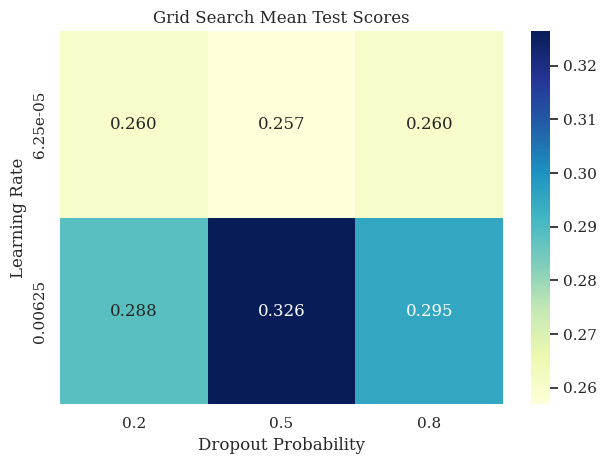

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

pivot_table = search_results.pivot(index = 'param_optimizer__lr',
                                   columns = 'param_module__drop_prob',
                                   values = 'mean_test_score')

fig, ax = plt.subplots()
sns.heatmap(pivot_table, annot = True, fmt = ".3f",
            cmap = "YlGnBu", cbar = True)
plt.title('Grid Search Mean Test Scores')
plt.ylabel('Learning Rate')
plt.xlabel('Dropout Probability')
plt.tight_layout()
plt.show()


In [ ]:
best_run = search_results[search_results['rank_test_score'] ==  1].squeeze()
print(
    f"Best hyperparameters were {best_run['params']} which gave a validation"
    f"accuracy of {best_run['mean_test_score'] * 100:.2f}% (training"
    f"accuracy of {best_run['mean_train_score'] * 100: .2f} %).")
eval_X = SliceDataset(eval_set, idx = 0)
eval_y = SliceDataset(eval_set, idx = 1)
score = search.score(eval_X, eval_y)
print(f"Eval accuracy is {score * 100: .2f}%.")


Best hyperparameters were {'module__drop_prob': 0.5, 'optimizer__lr': 0.00625} which gave a validationaccuracy of 32.64% (trainingaccuracy of  47.57 %).
Eval accuracy is  29.17%.
